# Librairies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA

# data

In [2]:
path = 'Mall_Customers.csv'
df = pd.read_csv(path)
display(df)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

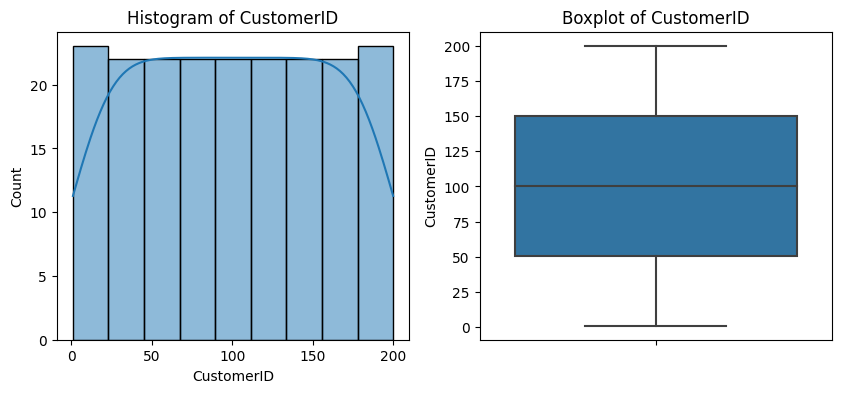

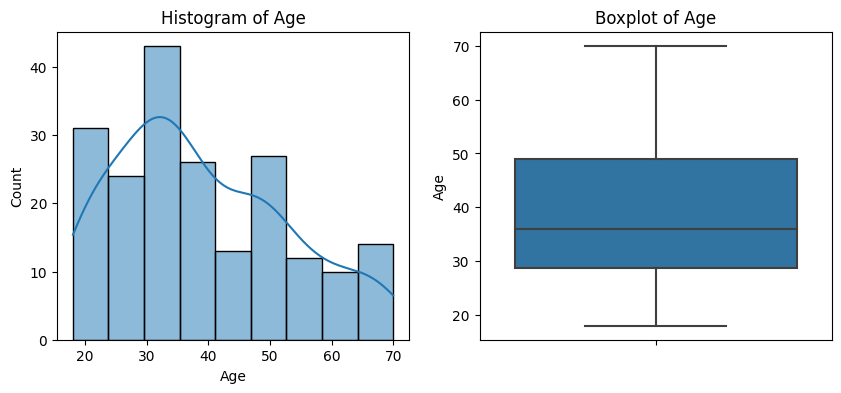

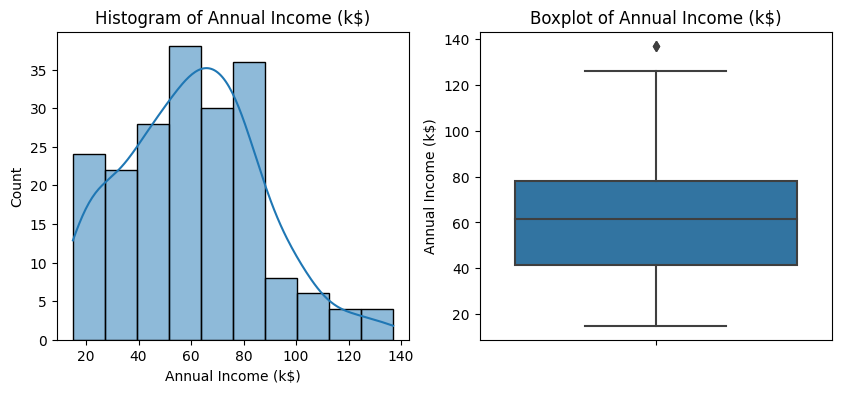

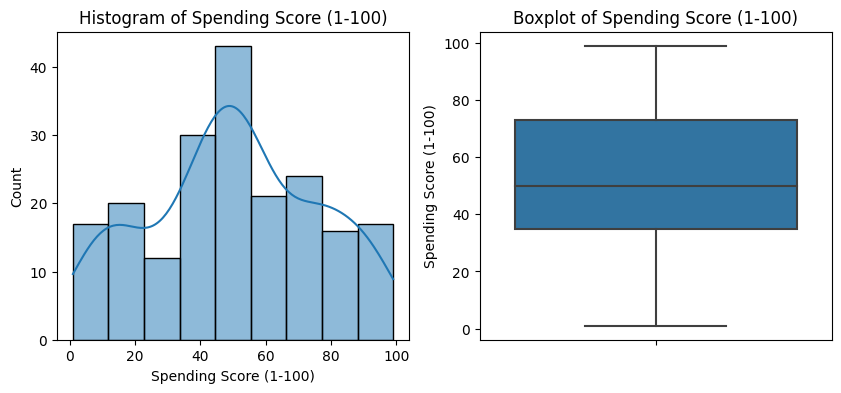

In [6]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

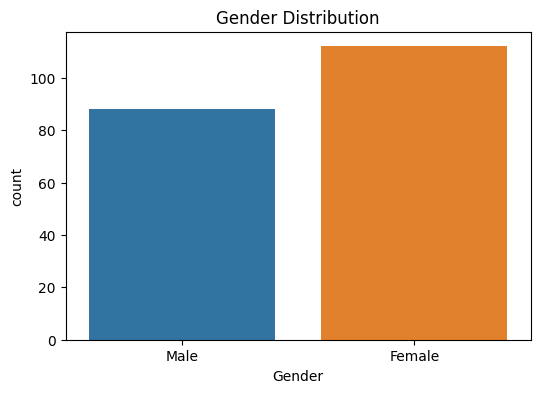

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

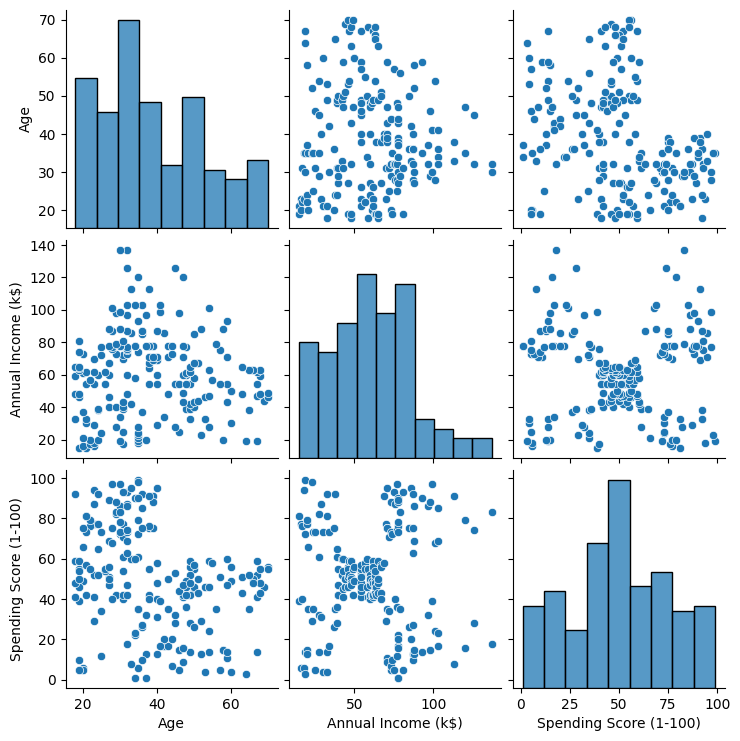

In [8]:
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()

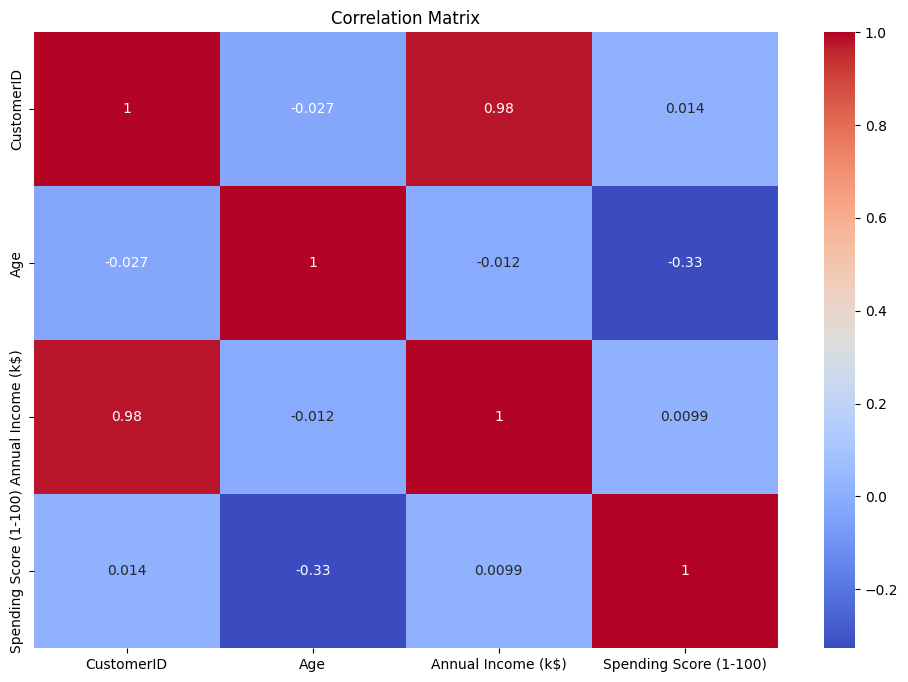

In [9]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Preprocessing

In [41]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

scaled_df = pd.DataFrame(scaled_features, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
scaled_df['Gender'] = df['Gender']

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,-1.424569,-1.738999,-0.434801,1
1,-1.281035,-1.738999,1.195704,1
2,-1.352802,-1.700830,-1.715913,0
3,-1.137502,-1.700830,1.040418,0
4,-0.563369,-1.662660,-0.395980,0
...,...,...,...,...
195,-0.276302,2.268791,1.118061,0
196,0.441365,2.497807,-0.861839,0
197,-0.491602,2.497807,0.923953,1
198,-0.491602,2.917671,-1.250054,1


In [42]:
scaled_df

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,-1.424569,-1.738999,-0.434801,1
1,-1.281035,-1.738999,1.195704,1
2,-1.352802,-1.700830,-1.715913,0
3,-1.137502,-1.700830,1.040418,0
4,-0.563369,-1.662660,-0.395980,0
...,...,...,...,...
195,-0.276302,2.268791,1.118061,0
196,0.441365,2.497807,-0.861839,0
197,-0.491602,2.497807,0.923953,1
198,-0.491602,2.917671,-1.250054,1


# Kmeans

## elbow method

In [11]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

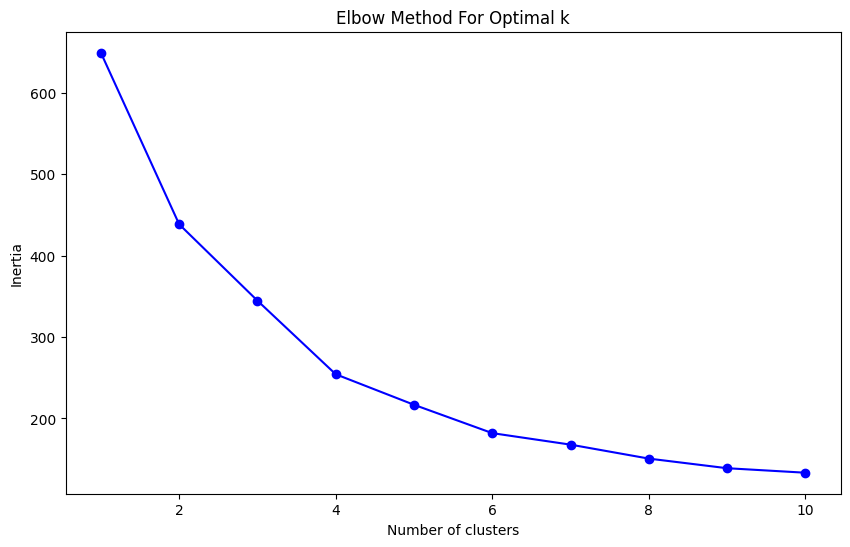

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

## model

In [13]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans.fit(scaled_df)

KMeans(n_clusters=5, n_init=10, random_state=42)

In [14]:
df['Cluster'] = kmeans.labels_
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,2
1,2,1,21,15,81,4
2,3,0,20,16,6,2
3,4,0,23,16,77,4
4,5,0,31,17,40,2
...,...,...,...,...,...,...
195,196,0,35,120,79,1
196,197,0,45,126,28,3
197,198,1,32,126,74,1
198,199,1,32,137,18,3


## stat

In [44]:
kmeans_summary = df.groupby('Cluster').mean()

kmeans_summary['Age_std'] = df.groupby('Cluster')['Age'].std()
kmeans_summary['Annual Income (k$)_std'] = df.groupby('Cluster')['Annual Income (k$)'].std()
kmeans_summary['Spending Score (1-100)_std'] = df.groupby('Cluster')['Spending Score (1-100)'].std()

kmeans_summary

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Agg_Cluster,DBSCAN_Cluster,Age_std,Annual Income (k$)_std,Spending Score (1-100)_std
Cluster,,,,,,,,,,
0,71.051724,0.431034,55.551724,48.482759,41.775862,1.431034,37.896552,8.324920,13.797077,15.658688
1,162.000000,0.461538,32.692308,86.538462,82.128205,2.000000,67.051282,3.728650,16.312485,9.364489
2,75.723404,0.340426,27.957447,50.000000,44.638298,0.617021,38.680851,7.309783,16.704595,13.029107
3,164.529412,0.588235,41.264706,88.500000,16.764706,3.823529,76.205882,10.768385,16.533254,9.881292
4,23.090909,0.409091,25.272727,25.727273,79.363636,0.000000,14.181818,5.257030,7.566731,10.504174


## viz

In [15]:

def create_radar_chart(data, title, labels):
    num_vars = len(labels)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    
    for cluster in df['Cluster'].unique():
        values = df[df['Cluster'] == cluster][labels].mean().tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Cluster {cluster}')
        ax.fill(angles, values, alpha=0.25)
    
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
    
    plt.title(title)
    plt.show()

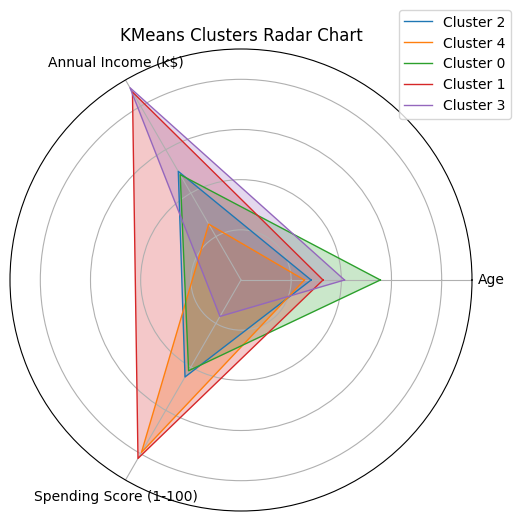

In [16]:
labels = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
create_radar_chart(scaled_df, 'KMeans Clusters Radar Chart', labels)

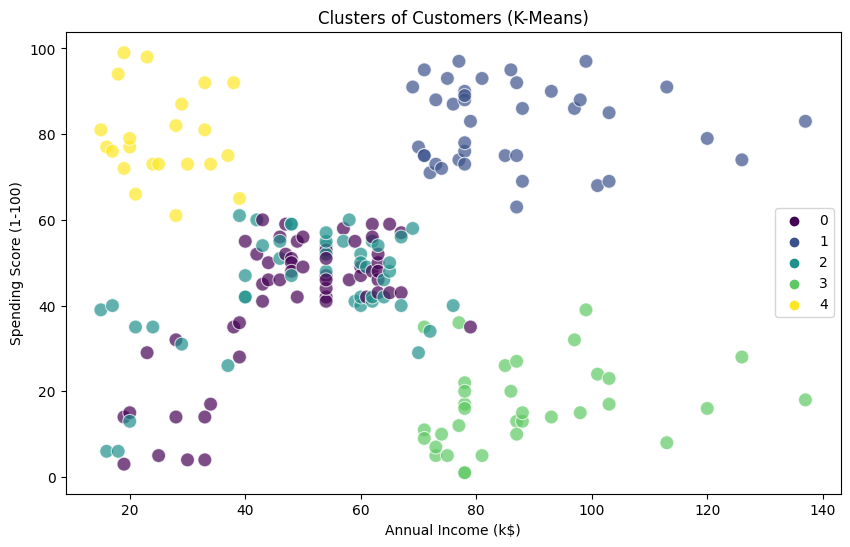

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=100, alpha=0.7)
plt.title('Clusters of Customers (K-Means)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

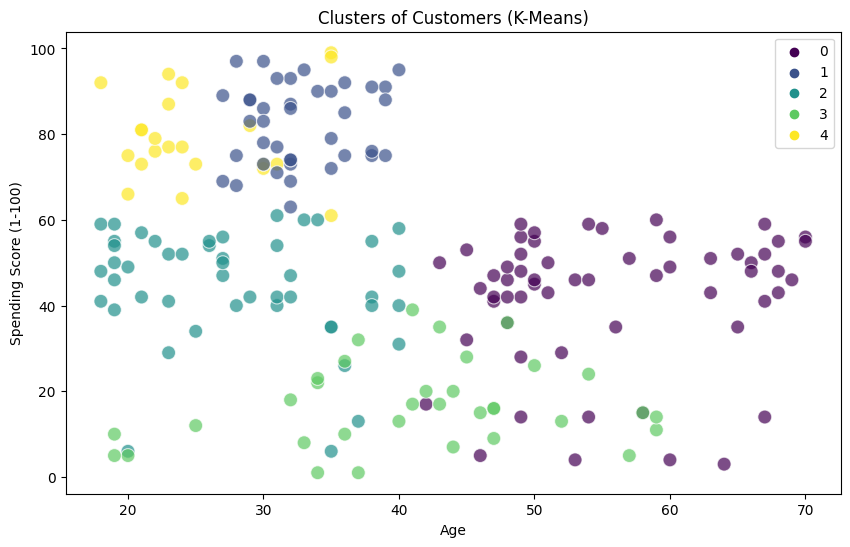

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=100, alpha=0.7)
plt.title('Clusters of Customers (K-Means)')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

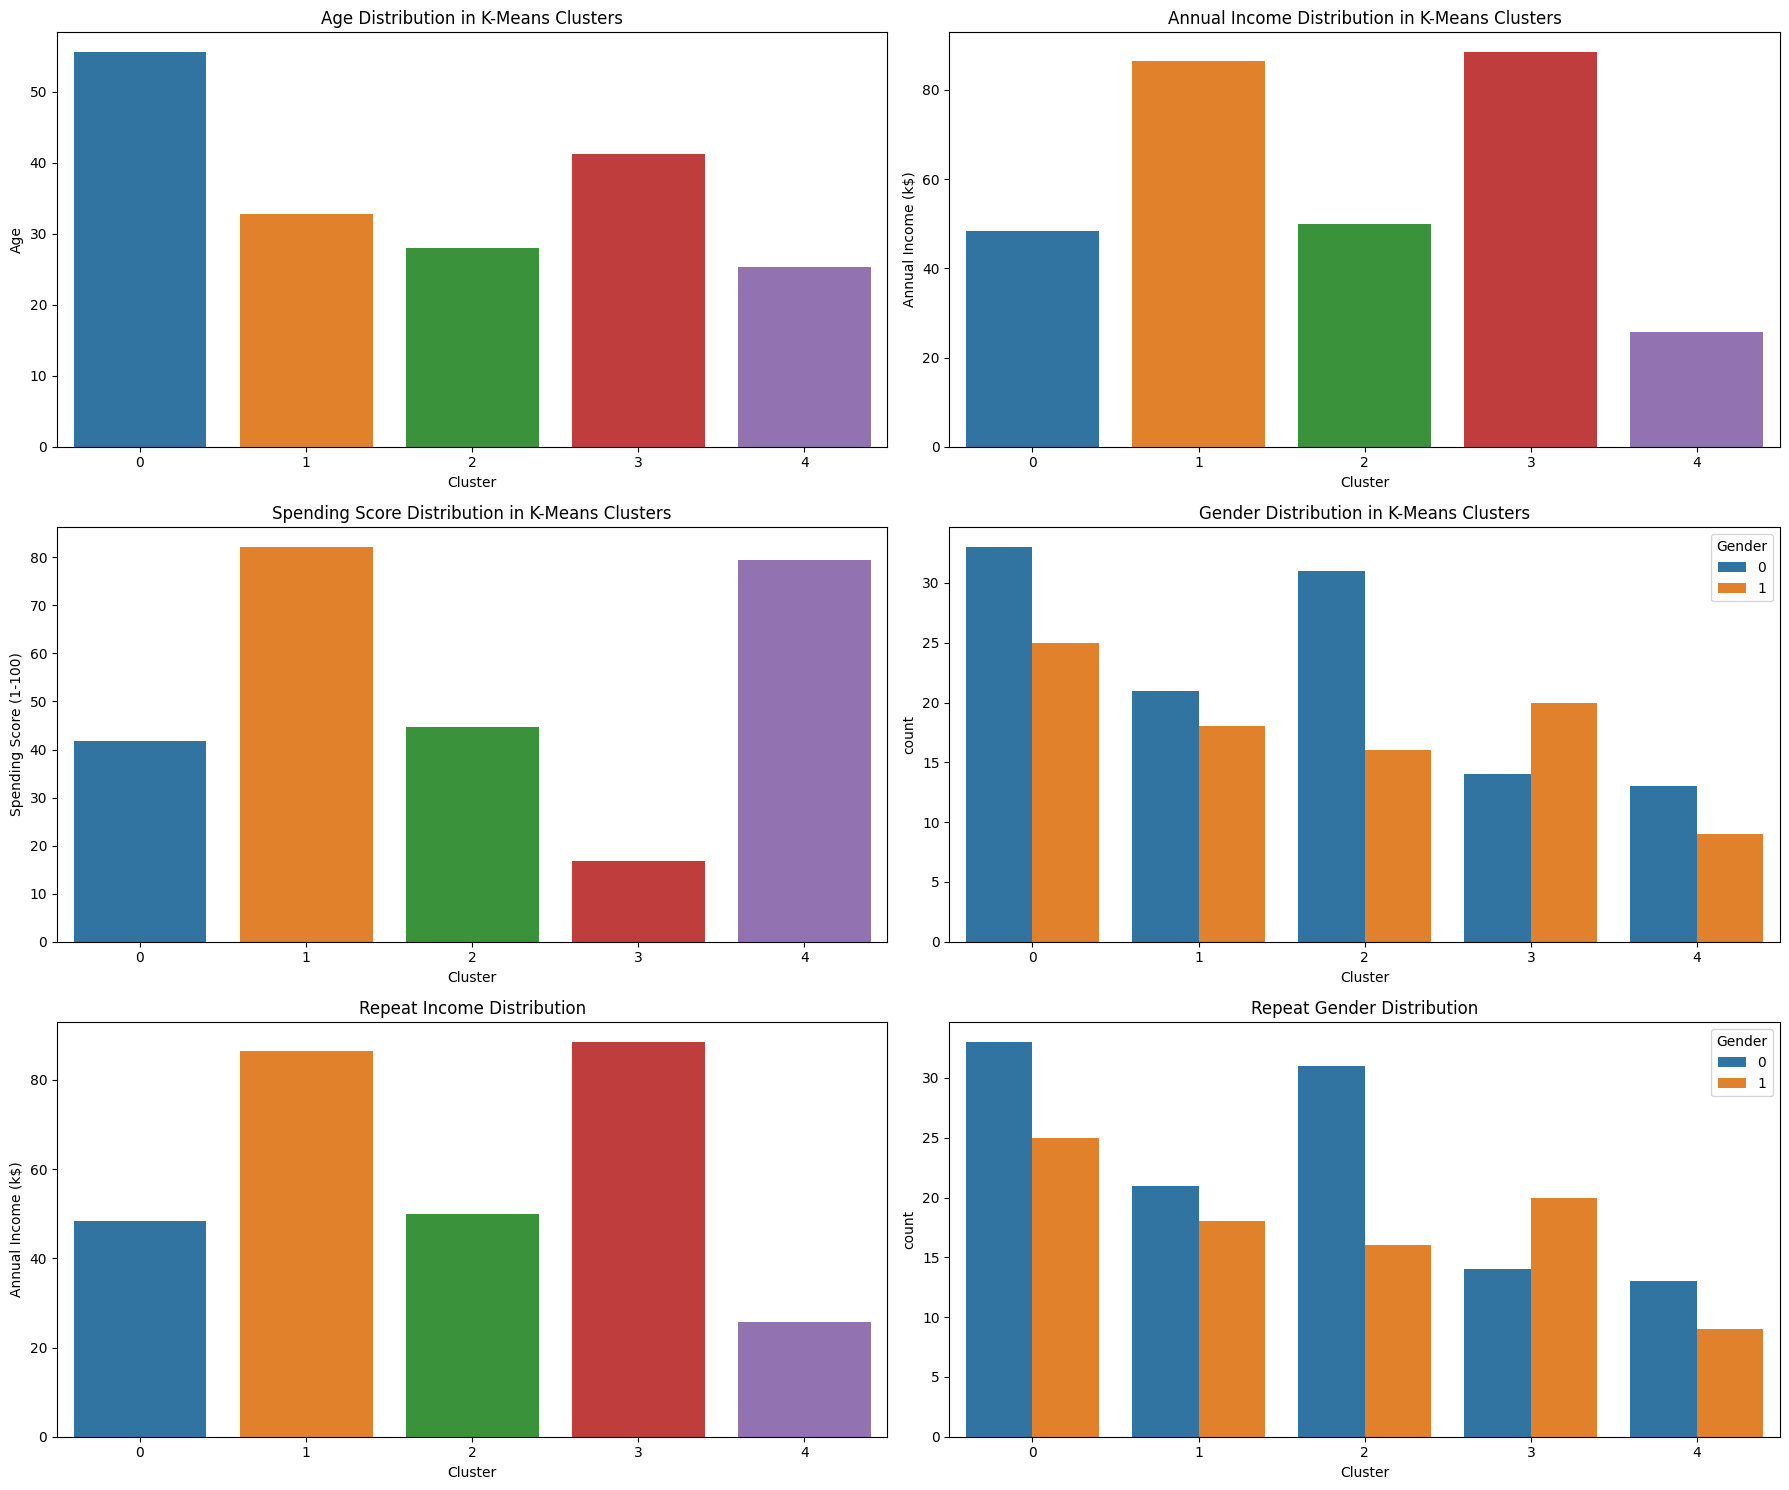

In [20]:
fig, axes = plt.subplots(3, 2, figsize=(18, 15))

sns.barplot(x='Cluster', y='Age', data=df, ax=axes[0, 0], ci=None)
axes[0, 0].set_title('Age Distribution in K-Means Clusters')

sns.barplot(x='Cluster', y='Annual Income (k$)', data=df, ax=axes[0, 1], ci=None)
axes[0, 1].set_title('Annual Income Distribution in K-Means Clusters')

sns.barplot(x='Cluster', y='Spending Score (1-100)', data=df, ax=axes[1, 0], ci=None)
axes[1, 0].set_title('Spending Score Distribution in K-Means Clusters')

sns.countplot(x='Cluster', hue='Gender', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Gender Distribution in K-Means Clusters')

# Add new plots to the last two subplots
sns.barplot(x='Cluster', y='Annual Income (k$)', data=df, ax=axes[2, 0], ci=None)
axes[2, 0].set_title('Repeat Income Distribution')

sns.countplot(x='Cluster', hue='Gender', data=df, ax=axes[2, 1])
axes[2, 1].set_title('Repeat Gender Distribution')

plt.tight_layout()
plt.show()

# Hierarchical Clustering

## dendogramme

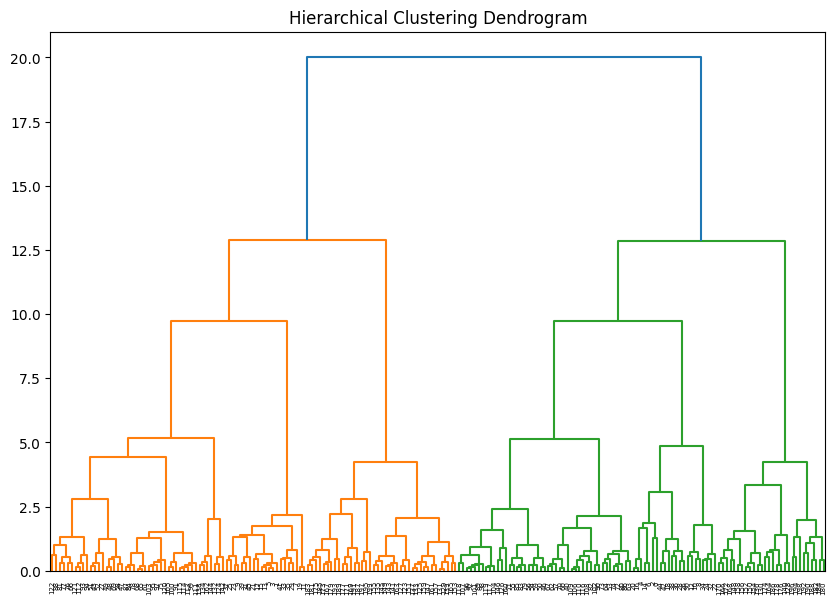

In [21]:
linked = linkage(scaled_features, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

## model

In [22]:
hierarchical_clustering = AgglomerativeClustering(n_clusters=5)
cluster_labels = hierarchical_clustering.fit_predict(scaled_df)
scaled_df['Cluster'] = cluster_labels

In [23]:
silhouette_avg = silhouette_score(scaled_df, cluster_labels)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.4900497708658173


## stat

In [40]:
agg_summary = df.groupby('Agg_Cluster').mean()

agg_summary['Age_std'] =df.groupby('Agg_Cluster')['Age'].std()
agg_summary['Annual Income (k$)_std'] = df.groupby('Agg_Cluster')['Annual Income (k$)'].std()
agg_summary['Spending Score (1-100)_std'] = df.groupby('Agg_Cluster')['Spending Score (1-100)'].std()

agg_summary

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,DBSCAN_Cluster,Age_std,Annual Income (k$)_std,Spending Score (1-100)_std
Agg_Cluster,,,,,,,,,,
0,65.000000,0.344828,25.931034,45.017241,60.517241,2.758621,33.568966,6.098208,17.773913,17.347067
1,82.100000,0.500000,54.960000,53.620000,48.240000,0.200000,42.780000,9.021426,10.020163,7.133022
2,162.000000,0.461538,32.692308,86.538462,82.128205,1.000000,67.051282,3.728650,16.312485,9.364489
3,21.300000,0.350000,43.750000,25.250000,19.050000,0.900000,14.900000,13.301662,7.397546,12.910522
4,166.090909,0.545455,41.454545,89.090909,16.181818,2.909091,76.818182,11.172206,16.451375,9.422230


## viz

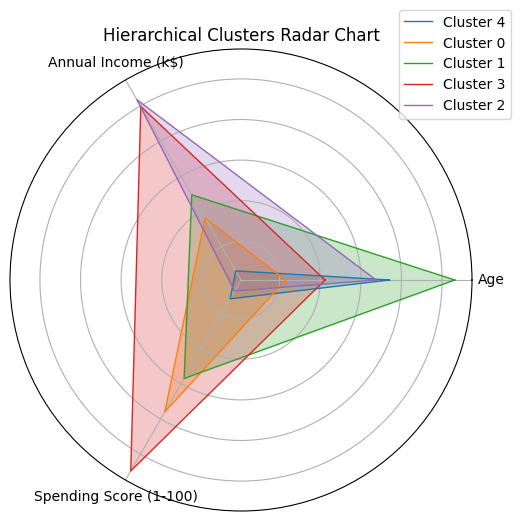

In [24]:
def create_radar_chart(data, title, labels):
    num_vars = len(labels)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    
    # The plot is a circle, so we need to "complete the loop"
    # and append the start to the end.
    angles += angles[:1]
    
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    
    for cluster in data['Cluster'].unique():
        values = data[data['Cluster'] == cluster][labels].mean().tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Cluster {cluster}')
        ax.fill(angles, values, alpha=0.25)
    
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
    
    plt.title(title)
    plt.show()

# Step 5: Define labels and create the radar chart
labels = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
create_radar_chart(scaled_df, 'Hierarchical Clusters Radar Chart', labels)

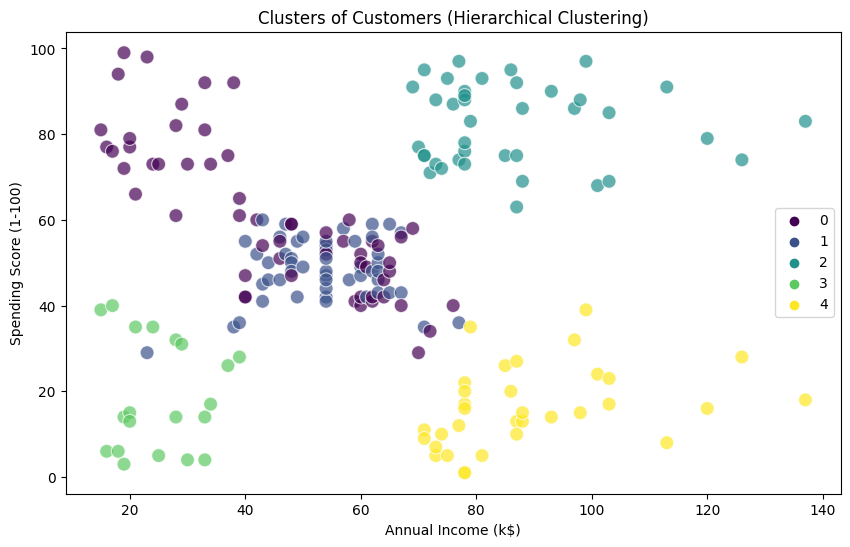

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Agg_Cluster', palette='viridis', s=100, alpha=0.7)
plt.title('Clusters of Customers (Hierarchical Clustering)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

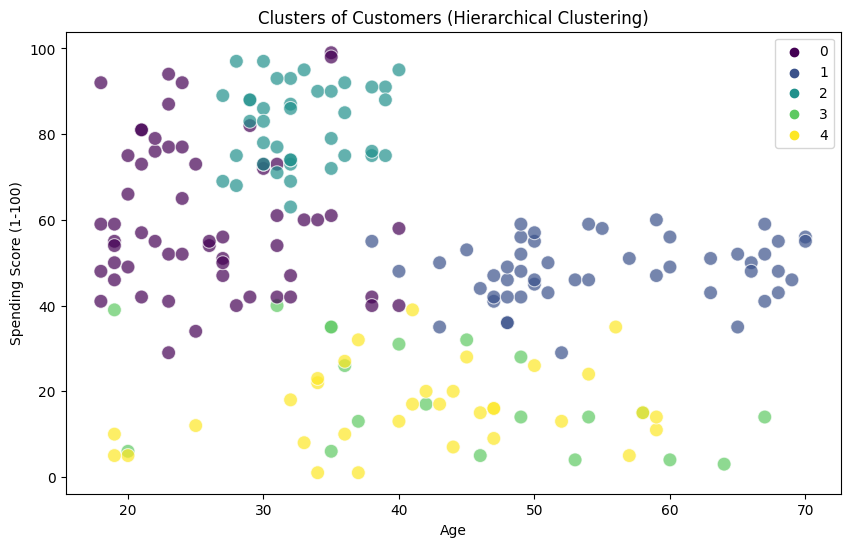

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Agg_Cluster', palette='viridis', s=100, alpha=0.7)
plt.title('Clusters of Customers (Hierarchical Clustering)')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

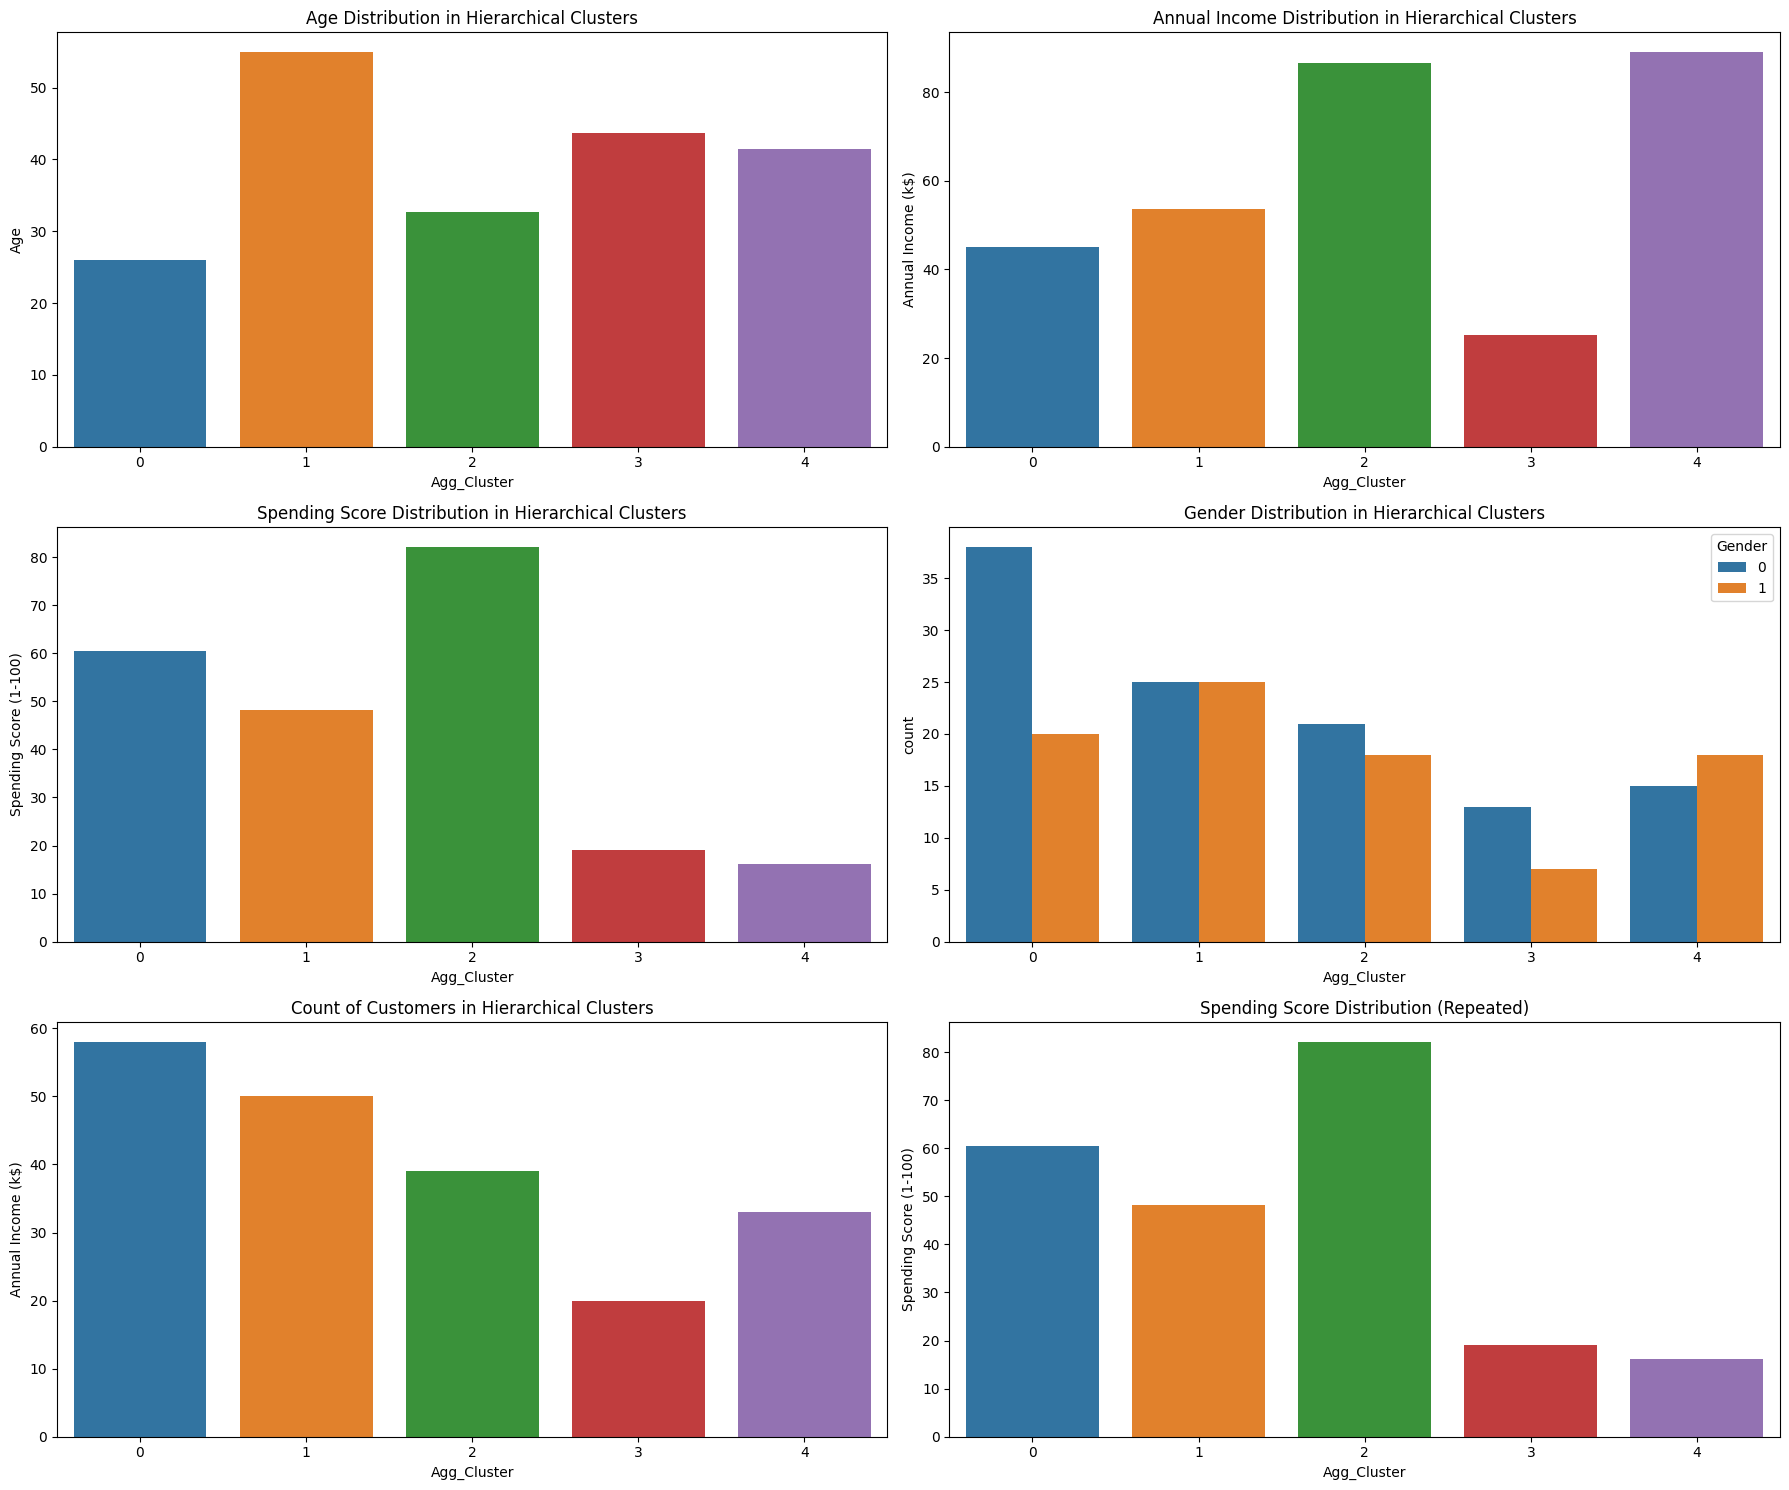

In [29]:
fig, axes = plt.subplots(3, 2, figsize=(18, 15))

sns.barplot(x='Agg_Cluster', y='Age', data=df, ax=axes[0, 0], ci=None)
axes[0, 0].set_title('Age Distribution in Hierarchical Clusters')

sns.barplot(x='Agg_Cluster', y='Annual Income (k$)', data=df, ax=axes[0, 1], ci=None)
axes[0, 1].set_title('Annual Income Distribution in Hierarchical Clusters')

sns.barplot(x='Agg_Cluster', y='Spending Score (1-100)', data=df, ax=axes[1, 0], ci=None)
axes[1, 0].set_title('Spending Score Distribution in Hierarchical Clusters')

sns.countplot(x='Agg_Cluster', hue='Gender', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Gender Distribution in Hierarchical Clusters')

sns.barplot(x='Agg_Cluster', y='Annual Income (k$)', data=df, ax=axes[2, 0], estimator=lambda x: len(x))
axes[2, 0].set_title('Count of Customers in Hierarchical Clusters')

sns.barplot(x='Agg_Cluster', y='Spending Score (1-100)', data=df, ax=axes[2, 1], ci=None)
axes[2, 1].set_title('Spending Score Distribution (Repeated)')

plt.tight_layout()
plt.show()

## explication

# DBSCAN

In [30]:
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(scaled_df)
distances, indices = nbrs.kneighbors(scaled_df)

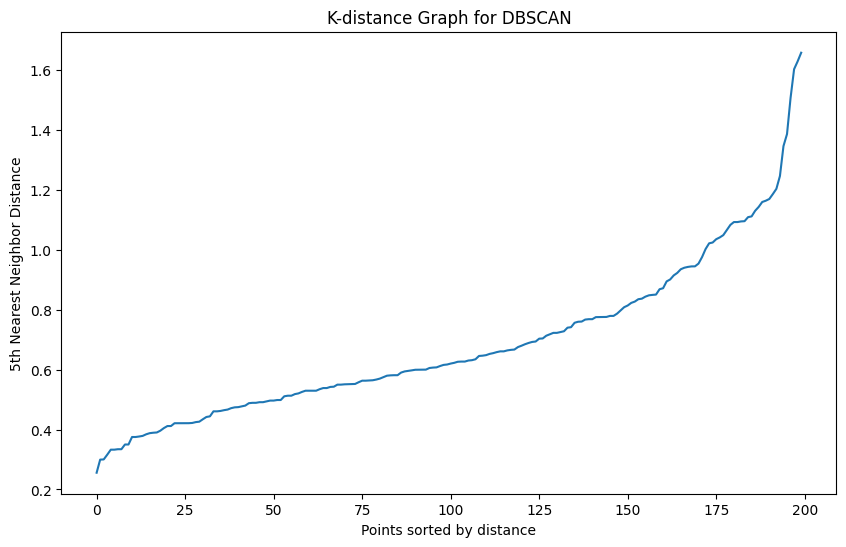

In [31]:
distances = np.sort(distances[:, 4])
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('K-distance Graph for DBSCAN')
plt.xlabel('Points sorted by distance')
plt.ylabel('5th Nearest Neighbor Distance')
plt.show()

In [32]:
best_score = -1
best_params = None

for eps in np.arange(0.1, 1.0, 0.1):
    for min_samples in range(1, 10):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(scaled_df)
        if len(set(labels)) > 1:  # Silhouette score is only valid if more than 1 cluster is present
            score = silhouette_score(scaled_df, labels)
            if score > best_score:
                best_score = score
                best_params = (eps, min_samples)

print(f"Best silhouette score: {best_score} with eps: {best_params[0]} and min_samples: {best_params[1]}")

Best silhouette score: 0.2804691505500038 with eps: 0.7000000000000001 and min_samples: 2


In [33]:
dbscan = DBSCAN(eps=0.4, min_samples=1)
df['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_df)

In [34]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,Agg_Cluster,DBSCAN_Cluster
0,1,1,19,15,39,2,3,0
1,2,1,21,15,81,4,0,1
2,3,0,20,16,6,2,3,2
3,4,0,23,16,77,4,0,3
4,5,0,31,17,40,2,3,4


# Evaluation modeles

## Score silhouette

In [35]:
kmeans_silhouette = silhouette_score(scaled_df, df['Cluster'])
hierarchical_silhouette = silhouette_score(scaled_df, df['Agg_Cluster'])
dbscan_silhouette = silhouette_score(scaled_df, df['DBSCAN_Cluster'])

kmeans_silhouette, hierarchical_silhouette, dbscan_silhouette

(0.33990354667163886, 0.4900497708658173, 0.24903080640193326)

## Calinski-Harabasz Index

In [36]:
kmeans_ch_score = calinski_harabasz_score(scaled_df, df['Cluster'])
hierarchical_ch_score = calinski_harabasz_score(scaled_df, df['Agg_Cluster'])
dbscan_ch_score = calinski_harabasz_score(scaled_df, df['DBSCAN_Cluster'])

kmeans_ch_score, hierarchical_ch_score, dbscan_ch_score

(70.46419911654758, 169.59809032463866, 80.8383398307596)

## Davies Bouldin index

In [37]:
kmeans_db_score = davies_bouldin_score(scaled_df, df['Cluster'])
hierarchical_db_score = davies_bouldin_score(scaled_df, df['Agg_Cluster'])
dbscan_db_score = davies_bouldin_score(scaled_df, df['DBSCAN_Cluster'])

kmeans_db_score, hierarchical_db_score, dbscan_db_score

(1.2504572298883656, 0.7968533742299373, 0.37265900697402893)

## recapitulatif

In [38]:
evaluation_metrics = {
    'Algorithm': ['KMeans', 'Hierarchical', 'DBSCAN'],
    'Silhouette Score': [kmeans_silhouette, hierarchical_silhouette, dbscan_silhouette],
    'Calinski-Harabasz Index': [kmeans_ch_score, hierarchical_ch_score, dbscan_ch_score],
    'Davies-Bouldin Index': [kmeans_db_score, hierarchical_db_score, dbscan_db_score]
}

evaluation_df = pd.DataFrame(evaluation_metrics)
evaluation_df

,Algorithm,Silhouette Score,Calinski-Harabasz Index,Davies-Bouldin Index
0,KMeans,0.339904,70.464199,1.250457
1,Hierarchical,0.490050,169.598090,0.796853
2,DBSCAN,0.249031,80.838340,0.372659


# info supplémentaire


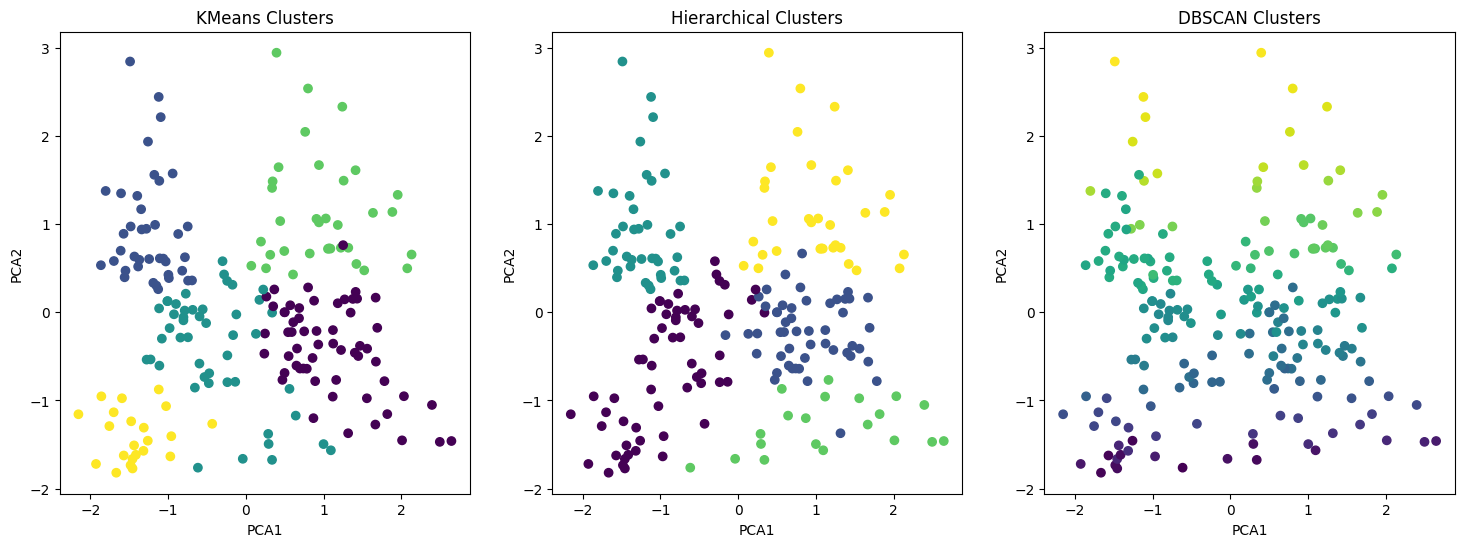

In [39]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

scaled_df['PCA1'] = pca_components[:, 0]
scaled_df['PCA2'] = pca_components[:, 1]

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].scatter(scaled_df['PCA1'], scaled_df['PCA2'], c=df['Cluster'], cmap='viridis')
axs[0].set_title('KMeans Clusters')
axs[0].set_xlabel('PCA1')
axs[0].set_ylabel('PCA2')

axs[1].scatter(scaled_df['PCA1'], scaled_df['PCA2'], c=df['Agg_Cluster'], cmap='viridis')
axs[1].set_title('Hierarchical Clusters')
axs[1].set_xlabel('PCA1')
axs[1].set_ylabel('PCA2')

axs[2].scatter(scaled_df['PCA1'], scaled_df['PCA2'], c=df['DBSCAN_Cluster'], cmap='viridis')
axs[2].set_title('DBSCAN Clusters')
axs[2].set_xlabel('PCA1')
axs[2].set_ylabel('PCA2')

plt.show()
